In [1]:
from numpy import NaN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import true

df = pd.read_csv('Data miners 2022 (answers).csv')

In [2]:
#string_to_list takes a string, lowercases it and turns it into a list of words
def string_to_list(string):
    string = string.lower()
    string = string.split()
    return string

#string_in_list takes a string and a list of words and returns true if the string is one of the words in the list
def string_in_list(string, list_of_words):
    string = string_to_list(string)
    for word in string:
        if word in list_of_words:
            return True
    return False

#string_in_list_index takes a list of words and a string and returns the index of that string in the list of words
def string_in_list_index(string, list_of_words):
    string = string_to_list(string)
    for word in string:
        if word in list_of_words:
            return list_of_words.index(word)
    return NaN

#check_if_left_is_num takes a string and a list of words and returns the number to the left of the string in the list of words
def check_if_left_is_num(string, list_of_words):
    string_index = string_in_list_index(string, list_of_words)
    index_val = list_of_words[string_index - 1]
    try:
        return int(index_val)
    except: 
        return NaN

#convert_experience_to_number takes a string and returns the number of years of experience
def convert_experience_to_number(string):
    list_of_words = string_to_list(string)
    if (string_in_list("year", list_of_words)):
        return check_if_left_is_num("year", list_of_words)
    elif(string_in_list("years", list_of_words)):
        return check_if_left_is_num("years", list_of_words)
    else:
        return NaN

# I add a new column to the df called programming_experience and fill it with the values that result from applying the function convert_experience_to_number to the column How long time have you been programming
df['programming_experience'] = df['How long time have you been programming?'].apply(convert_experience_to_number)


In [3]:
# I create a new column in the data frame called "python_skills". I then convert the ordinal data from 'How are your Python skills?' and populate the new column with it. 
df['python_skills'] = df['How are your Python skills?'].map({"Non-existing - I don't like snakes": 0, "I have heard about it and have an idea about what it can be used for": 1, "I can understand/read simple Python scripts, but have never written one": 2, "I have tried to write simple scripts in Python" : 3, "I am quite capable of programming in Python": 4, "I am a Python wizard": 5})

#I then remove all the columns but programming_experience and python_skills"
df = df[['programming_experience', 'python_skills']]

In [4]:
#Calculate the mean, std and var of the python experience and programming_experience
ps_mean = df['python_skills'].mean()
ps_median = df['python_skills'].median()
ps_std = df['python_skills'].std()
ps_var = df['python_skills'].var()

pe_mean = df['programming_experience'].mean()
pe_median = df['programming_experience'].median()
pe_std = df['programming_experience'].std()
pe_var = df['programming_experience'].var()


Text(0, 0.5, 'Number of observations')

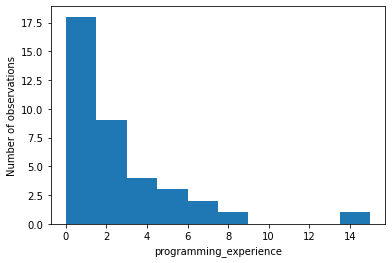

In [5]:
#plot programming experience to check for outliers
plt.hist(df['programming_experience'])
plt.xlabel('programming_experience')
plt.ylabel('Number of observations')


Text(0, 0.5, 'Number of observations')

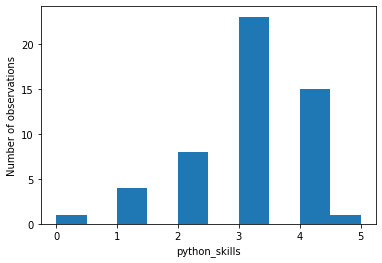

In [6]:
#plot python skills to check for outliers
plt.hist(df['python_skills'])
plt.xlabel('python_skills')
plt.ylabel('Number of observations')

In [7]:

# remove outliers, which I define as observations that are more than 3 standard deviations away from the mean
df = df[(df['python_skills'] - df['python_skills'].mean()).abs() <= 3 * df['python_skills'].std()]
df = df[(df['programming_experience'] - df['programming_experience'].mean()).abs() <= 3 * df['programming_experience'].std()]

#if programming_experience is NaN, I replace it with the mean programming_experience
df['programming_experience'] = df['programming_experience'].fillna(df['programming_experience'].mean())
#if python_skills is NaN, I replace it with the mean python_skills
df['python_skills'] = df['python_skills'].fillna(df['python_skills'].mean())

df['python_skills'] = df['python_skills'] / max(df['python_skills']) # Normalize python skills
df['programming_experience'] = df['programming_experience'] / max(df['programming_experience']) # Normalize programming_experience


0.6470923202771849


<AxesSubplot:xlabel='programming_experience', ylabel='python_skills'>

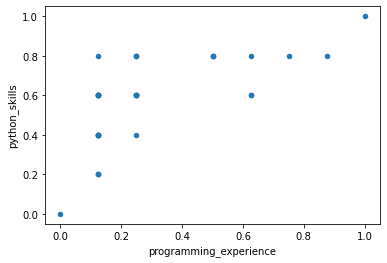

In [8]:

pearson = df['programming_experience'].corr(df['python_skills'], method='pearson')
print(pearson)

#I create a scatter plot that shows the relationship between python experience and programming_experience
df.plot.scatter(x='programming_experience', y='python_skills')


#Relationship

    


[0.57734359 0.41139056]


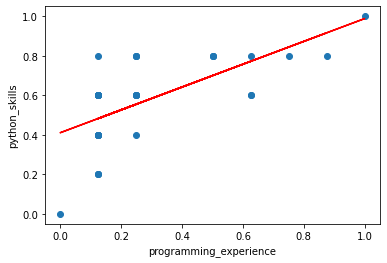

In [9]:
# We set programming_experience as the independent variable and python skills as the dependent variable, and calculate the linear regression
reg = np.polyfit(df['programming_experience'], df['python_skills'], 1)

# on the x-axis we have the programming_experience and on the y-axis we have the python_skills
trend = np.polyval(reg, df['programming_experience'])
plt.scatter(df['programming_experience'], df['python_skills']) 
plt.plot(df['programming_experience'], trend, color='red')

plt.xlabel('programming_experience')
plt.ylabel('python_skills')

print(reg)

# Linear expression explains the relationship between the two variables. The first value is the slope and the second value is the intercept of the line


In [10]:
#calculate the sum of squared regression
ssr = sum((df['python_skills'] - trend)**2)

#calculate the sum of squared total
sst = sum((df['python_skills'] - df['python_skills'].mean())**2)

#calculate the r-squared
r_squared = 1 - (ssr/sst)

# this means that 0.41% of the variation in python skills can be explained by programming_experience
print(r_squared)



0.4187284709617112
